In [89]:
!pip install statistics

In [90]:
!pip install astropy

In [91]:
# Converting DZStats by Kurt Sundell into a Python program

In [162]:
# Kolmogorov-Smirnov Test Code
import numpy as np
from scipy import stats

df = pd.read_excel('ForAgeCalc.xlsx')
data1 = df['RNHW'].dropna().to_numpy()
data2 = df['Gilder GS-11'].dropna().to_numpy()

stats.ks_2samp(data1, data2, nan_policy='omit')

KstestResult(statistic=np.float64(0.1524876305662452), pvalue=np.float64(0.10830244926279575), statistic_location=np.float64(1218.0), statistic_sign=np.int8(1))

In [166]:
stats.ks_2samp(data1, data2, nan_policy='propagate', method='exact')

KstestResult(statistic=np.float64(0.1524876305662452), pvalue=np.float64(0.10830244926279575), statistic_location=np.float64(1218.0), statistic_sign=np.int8(1))

In [128]:
df = pd.read_excel('ForAgeCalc.xlsx')
data3 = df['PB'].to_numpy()
data4 = df['FL3'].to_numpy()

stats.ks_2samp(data3, data4, alternative='two-sided', nan_policy='omit')

KstestResult(statistic=np.float64(0.06886694386694386), pvalue=np.float64(0.9092391643909453), statistic_location=np.float64(1093.01), statistic_sign=np.int8(-1))

In [129]:
df = pd.read_excel('ForAgeCalc.xlsx')
data5 = df['E79'].to_numpy()
data6 = df['NY14-TAP-22'].to_numpy()

stats.ks_2samp(data5, data6, alternative='two-sided', nan_policy='omit')

KstestResult(statistic=np.float64(0.4356299212598425), pvalue=np.float64(4.356451974239638e-11), statistic_location=np.float64(1000.0), statistic_sign=np.int8(1))

In [159]:
df = pd.read_excel('ForAgeCalc.xlsx')
data100 = df['RNHW'].to_numpy()
data101 = df['RNHE'].to_numpy()

stats.ks_2samp(data100, data101, alternative='two-sided', nan_policy='omit')

KstestResult(statistic=np.float64(0.2552521008403361), pvalue=np.float64(0.0009139165933278022), statistic_location=np.float64(1061.0), statistic_sign=np.int8(-1))

In [160]:
# Kolmogorov-Smirnov Test Function
def ks_test(file_name, col_name1, col_name2):
    df = pd.read_excel(file_name)
    data1 = df[col_name1].to_numpy()
    data2 = df[col_name2].to_numpy()
    return stats.ks_2samp(data1, data2, alternative='two-sided', nan_policy='omit')

In [161]:
ks_test('ForAgeCalc.xlsx', 'PB', 'FL3')

KstestResult(statistic=np.float64(0.06886694386694386), pvalue=np.float64(0.9092391643909453), statistic_location=np.float64(1093.01), statistic_sign=np.int8(-1))

In [167]:
ks_test('ForAgeCalc.xlsx', 'PB', 'RNHW')

KstestResult(statistic=np.float64(0.09954751131221719), pvalue=np.float64(0.56210658175457), statistic_location=np.float64(1184.0), statistic_sign=np.int8(-1))

In [168]:
ks_test('ForAgeCalc.xlsx', 'FL3', 'RNHW')

KstestResult(statistic=np.float64(0.06279809220985691), pvalue=np.float64(0.9197336317921045), statistic_location=np.float64(1195.0), statistic_sign=np.int8(-1))

In [169]:
ks_test('ForAgeCalc.xlsx', 'E79', 'RNHW')

KstestResult(statistic=np.float64(0.28284313725490196), pvalue=np.float64(5.299728927621806e-05), statistic_location=np.float64(997.0), statistic_sign=np.int8(1))

In [132]:
# Kuiper Test Code
import astropy
from astropy import stats
from astropy.stats import kuiper_two

df = pd.read_excel('ForAgeCalc.xlsx')
data7 = df['RNHE'].dropna().to_numpy()
data8 = df['RNHW'].dropna().to_numpy()
kuiper_two(data7, data8)

(0.2797118847539016, np.float64(0.003042951016084474))

In [133]:
print(len(data8))

136


In [134]:
# Kuiper Test Function
def kuiper_test(file_name, col_name1, col_name2):
    df = pd.read_excel(file_name)
    data1 = df[col_name1].dropna().to_numpy()
    data2 = df[col_name2].dropna().to_numpy()
    return kuiper_two(data1, data2)

In [135]:
kuiper_test('ForAgeCalc.xlsx', 'PB', 'FL3')

(0.1288981288981289, np.float64(0.7596953736522171))

In [136]:
kuiper_test('ForAgeCalc.xlsx', 'RNHW', 'Gilder GS-11')

(0.17255360087960417, np.float64(0.29292275294596803))

In [137]:
kuiper_test('ForAgeCalc.xlsx', 'E79', 'NY14-TAP-22')

(0.4439632545931735, np.float64(1.127755151380478e-09))

In [138]:
import numpy as np
from numpy import copy, sort, amax, arange, exp, sqrt, abs, floor, searchsorted
import itertools

def kuiper_FPP(D,N):
    """Compute the false positive probability for the Kuiper statistic.

    Uses the set of four formulas described in Paltani 2004; they report 
    the resulting function never underestimates the false positive probability 
    but can be a bit high in the N=40..50 range. (They quote a factor 1.5 at 
    the 1e-7 level.

    Parameters
    ----------
    D : float
        The Kuiper test score.
    N : float
        The effective sample size.

    Returns
    -------
    fpp : float
        The probability of a score this large arising from the null hypothesis.

    Reference
    ---------
    Paltani, S., "Searching for periods in X-ray observations using 
    Kuiper's test. Application to the ROSAT PSPC archive", Astronomy and
    Astrophysics, v.240, p.789-790, 2004.

    """
    if D<0. or D>2.:
        raise ValueError("Must have 0<=D<=2 by definition of the Kuiper test")

    if D<2./N:
        return 1. - factorial(N)*(D-1./N)**(N-1)
    elif D<3./N:
        k = -(N*D-1.)/2.
        r = sqrt(k**2 - (N*D-2.)/2.)
        a, b = -k+r, -k-r
        return 1. - factorial(N-1)*(b**(N-1.)*(1.-a)-a**(N-1.)*(1.-b))/float(N)**(N-2)*(b-a)
    elif (D>0.5 and N%2==0) or (D>(N-1.)/(2.*N) and N%2==1):
        def T(t):
            y = D+t/float(N)
            return y**(t-3)*(y**3*N-y**2*t*(3.-2./N)/N-t*(t-1)*(t-2)/float(N)**2)
        s = 0.
        # NOTE: the upper limit of this sum is taken from Stephens 1965
        for t in xrange(int(floor(N*(1-D)))+1):
            term = T(t)*comb(N,t)*(1-D-t/float(N))**(N-t-1)
            s += term
        return s
    else:
        z = D*sqrt(N) 
        S1 = 0.
        term_eps = 1e-12
        abs_eps = 1e-100
        for m in itertools.count(1):
            T1 = 2.*(4.*m**2*z**2-1.)*exp(-2.*m**2*z**2)
            so = S1
            S1 += T1
            if abs(S1-so)/(abs(S1)+abs(so))<term_eps or abs(S1-so)<abs_eps:
                break
        S2 = 0.
        for m in itertools.count(1):
            T2 = m**2*(4.*m**2*z**2-3.)*exp(-2*m**2*z**2)
            so = S2
            S2 += T2
            if abs(S2-so)/(abs(S2)+abs(so))<term_eps or abs(S1-so)<abs_eps:
                break
        return S1 - 8*D/(3.*sqrt(N))*S2

In [139]:
def kuiper_dos(data1, data2):
    """Compute the Kuiper statistic to compare two samples.

    Parameters
    ----------
    data1 : array-like
        The first set of data values.
    data2 : array-like
        The second set of data values.
    
    Returns
    -------
    D : float
        The raw test statistic.
    fpp : float
        The probability of obtaining two samples this different from
        the same distribution.

    Notes
    -----
    Warning: the fpp is quite approximate, especially for small samples.

    """
    data1, data2 = sort(data1), sort(data2)

    if len(data2)<len(data1):
        data1, data2 = data2, data1

    cdfv1 = searchsorted(data2, data1)/float(len(data2)) # this could be more efficient
    cdfv2 = searchsorted(data1, data2)/float(len(data1)) # this could be more efficient
    D = (amax(cdfv1-arange(len(data1))/float(len(data1))) + 
            amax(cdfv2-arange(len(data2))/float(len(data2))))

    Ne = len(data1)*len(data2)/float(len(data1)+len(data2))
    return D, kuiper_FPP(D, Ne)

In [140]:
df = pd.read_excel('ForAgeCalc.xlsx')
data_one = df['RNHW'].dropna().to_numpy()
data_two = df['RNHE'].dropna().to_numpy()

In [141]:
kuiper_dos(data_one, data_two)

(np.float64(0.2797118847539015), np.float64(0.00433500859876872))

In [142]:
df = pd.read_excel('ForAgeCalc.xlsx')
data_three = df['PB'].dropna().to_numpy()
data_four = df['FL3'].dropna().to_numpy()

In [143]:
kuiper_dos(data_three, data_four)

(np.float64(0.1288981288981289), np.float64(0.8061413808208829))

In [144]:
df = pd.read_excel('ForAgeCalc.xlsx')
data_five = df['E79'].dropna().to_numpy()
data_six = df['NY14-TAP-22'].dropna().to_numpy()

In [145]:
kuiper_dos(data_five, data_six)

(np.float64(0.4439632545931758), np.float64(2.417051761587353e-09))

In [152]:
from __future__ import division, print_function, absolute_import
import numpy as np
import pandas as pd
import math
from scipy.stats import gaussian_kde as scipy_gaussian_kde
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt

def kde_function(dataFrame, colName, bw, the_color, the_alpha, lower, upper, nums, title):
    data = dataFrame[colName].dropna()
    kde = gaussian_kde(data, bw_method=bw)
    x_vals = np.linspace(lower, upper, nums)
    density = kde(x_vals)
    plt.plot(x_vals, density, color=the_color)
    plt.fill_between(x_vals, density, color=the_color, alpha=the_alpha)
    plt.xlabel('Age (Ma)')
    plt.ylabel('Density')
    plt.title(title)

In [153]:
forAgeCalcdf = pd.read_excel('ForAgeCalc.xlsx', usecols=['Gilder GS-11'])

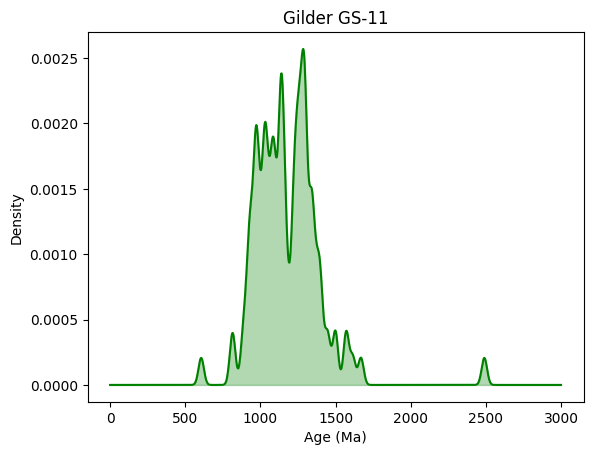

In [154]:
kde_function(forAgeCalcdf, 'Gilder GS-11', 0.08, 'green', 0.3, 0, 3000, 1000, 'Gilder GS-11')